# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow opencv-python matplotlib


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip list

Package                       Version
----------------------------- ---------------
absl-py                       1.4.0
aiobotocore                   2.4.2
aiofiles                      22.1.0
aiohttp                       3.8.3
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
alembic                       1.11.3
anaconda-catalogs             0.2.0
anaconda-client               1.12.0
anaconda-navigator            2.4.2
anaconda-project              0.11.1
anyio                         4.0.0
appdirs                       1.4.4
argon2-cffi                   23.1.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.2.1
astunparse                    1.6.3
async-lru                     2.0.4
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs    


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import tensorflow as tf
import os

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [46]:
import cv2

In [47]:
data_dir = 'data' 

In [48]:
image_exts = ['.jpeg','.jpg', '.bmp', '.png']

In [50]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = os.path.splitext(image_path)[1]
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list data\happy\demo.docx


# 3. Load Data

In [10]:
import numpy as np
from matplotlib import pyplot as plt

In [11]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [12]:
data_iterator = data.as_numpy_iterator()

In [13]:
batch = data_iterator.next()

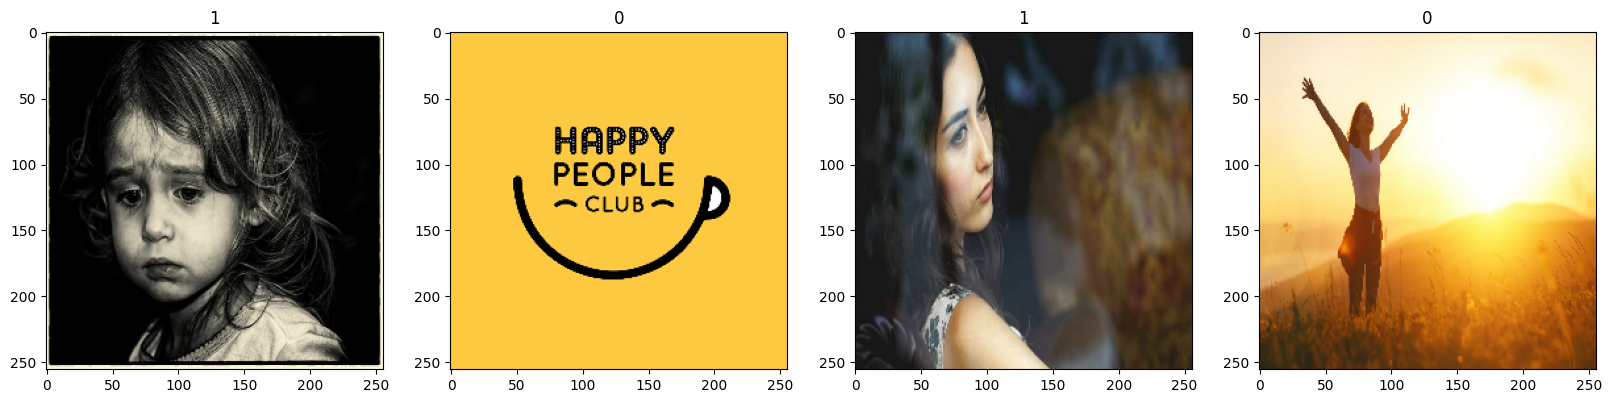

In [14]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [15]:
data = data.map(lambda x,y: (x/255, y))

In [16]:
data.as_numpy_iterator().next()

(array([[[[0.38106617, 0.39675245, 0.4398897 ],
          [0.39025736, 0.40594363, 0.44908088],
          [0.39944854, 0.41513482, 0.45827207],
          ...,
          [0.33838847, 0.34509805, 0.38207722],
          [0.3304228 , 0.33927697, 0.3833027 ],
          [0.34016544, 0.34800857, 0.3950674 ]],
 
         [[0.38370097, 0.39938724, 0.44252452],
          [0.39289215, 0.40857843, 0.45171568],
          [0.40095118, 0.41663748, 0.45977473],
          ...,
          [0.33838847, 0.34509805, 0.38207722],
          [0.3323783 , 0.343188  , 0.38134718],
          [0.34039187, 0.34846145, 0.394841  ]],
 
         [[0.3867647 , 0.40245098, 0.4473652 ],
          [0.3959559 , 0.41164216, 0.45655638],
          [0.40346202, 0.4191483 , 0.4640625 ],
          ...,
          [0.34016544, 0.346875  , 0.38385418],
          [0.33379146, 0.34555617, 0.3808503 ],
          [0.3421267 , 0.35030684, 0.39635465]],
 
         ...,
 
         [[0.04865148, 0.08483551, 0.11994533],
          [0.04770

# 5. Split Data

In [17]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [54]:
test_size

1

In [19]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [20]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [22]:
model = Sequential()

In [23]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [24]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# 7. Train

In [26]:
logdir='logs'

In [27]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [28]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 6s 613ms/step - loss: 0.7045 - accuracy: 0.5446 - val_loss: 0.6114 - val_accuracy: 0.5156
Epoch 2/20
7/7 [==============================] - 5s 593ms/step - loss: 0.5851 - accuracy: 0.7188 - val_loss: 0.4784 - val_accuracy: 0.7812
Epoch 3/20
7/7 [==============================] - 5s 599ms/step - loss: 0.5424 - accuracy: 0.7634 - val_loss: 0.4612 - val_accuracy: 0.7656
Epoch 4/20
7/7 [==============================] - 5s 625ms/step - loss: 0.4085 - accuracy: 0.8393 - val_loss: 0.3920 - val_accuracy: 0.8281
Epoch 5/20
7/7 [==============================] - 6s 752ms/step - loss: 0.3042 - accuracy: 0.8884 - val_loss: 0.1640 - val_accuracy: 0.9688
Epoch 6/20
7/7 [==============================] - 5s 634ms/step - loss: 0.2351 - accuracy: 0.9375 - val_loss: 0.1540 - val_accuracy: 1.0000
Epoch 7/20
7/7 [==============================] - 5s 602ms/step - loss: 0.1658 - accuracy: 0.9420 - val_loss: 0.0866 - val_accuracy: 1.0000
Epoch 8/20
7/7 [====

# 8. Plot Performance

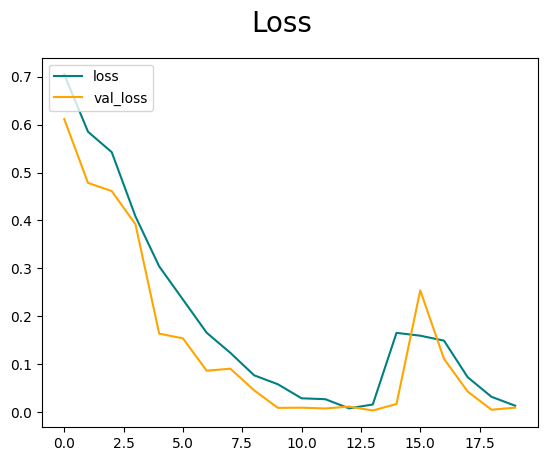

In [55]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

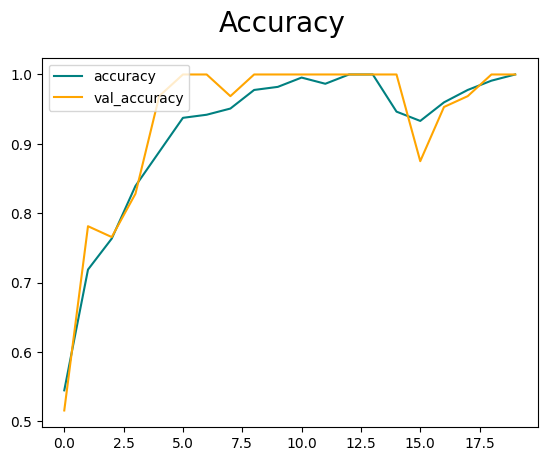

In [56]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [31]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [32]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [33]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 121ms/step


In [34]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [35]:
import cv2

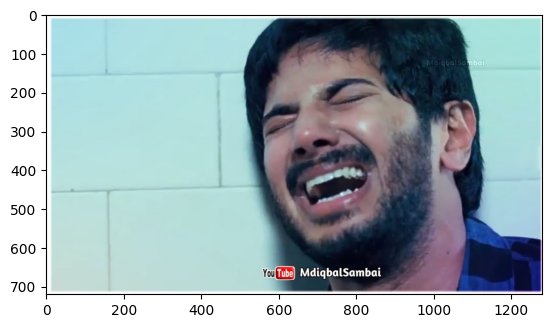

In [113]:
img = cv2.imread('dkcry.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

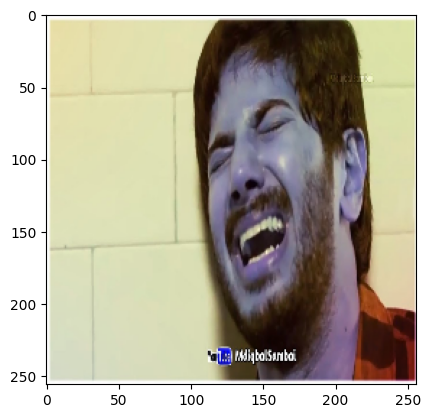

In [114]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [115]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 24ms/step


In [116]:
yhat

array([[0.9680359]], dtype=float32)

In [117]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


# 11. Save the Model

In [118]:
from tensorflow.keras.models import load_model

In [119]:
model.save(os.path.join('models','imageclassifier.h5'))

In [120]:
new_model = load_model('imageclassifier.h5')

OSError: No file or directory found at imageclassifier.h5

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))